In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=100
sns.set_style('darkgrid')

###  Load the dataset

In [2]:
df=pd.read_excel(r"E:\DS PYTHON\Assignment\Airlines+Data.xlsx")

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


### EDA

In [4]:
df['Passengers'].isnull().sum()

0

In [5]:
# plot line chart for look seasonal pattern or trend

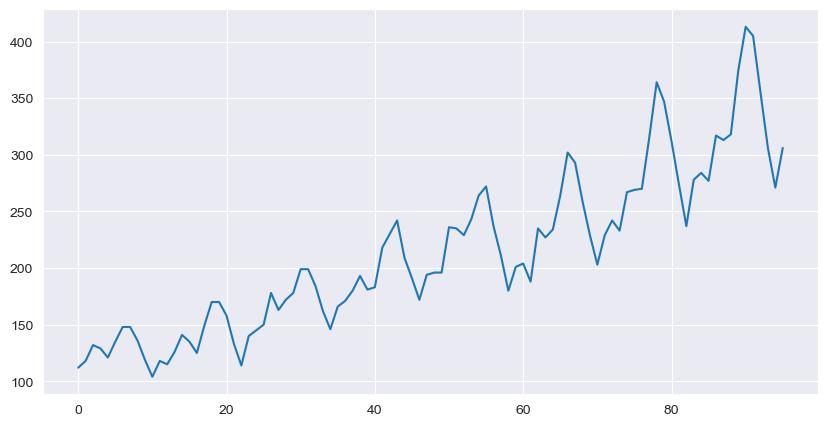

In [6]:
plt.plot(df['Passengers'])

In [7]:
# so this is the linear trend data with multiplicative seasonality 
# and also this is non stationary data

#### Convert non-stationary data into stationary

In [8]:
# First order difference

In [9]:
df['First-order']=df['Passengers'].diff(periods=1)
df

,Month,Passengers,First-order
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0
...,...,...,...
91,2002-08-01,405,-8.0
92,2002-09-01,355,-50.0
93,2002-10-01,306,-49.0
94,2002-11-01,271,-35.0


In [10]:
# drop na value

In [11]:
df.dropna(inplace=True)

In [12]:
# checking weather non stationary data convert into stationary data or not,plot line chart

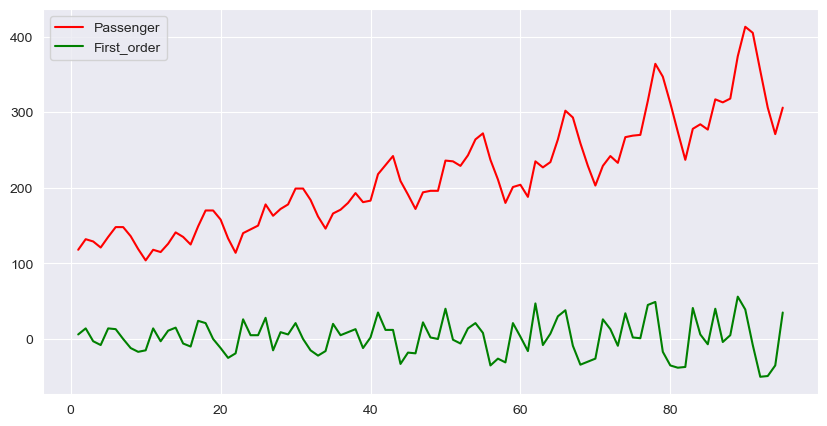

In [13]:
plt.plot(df['Passengers'],color='red',label='Passenger')
plt.plot(df['First-order'],color='green',label='First_order')
plt.legend()
plt.show()

In [14]:
# so the data is converted into stationary format

###  Calculate Autocorrelation

In [15]:
acf_value=acf(df['First-order'])
acf_value

array([ 1.        ,  0.24719303, -0.15621114, -0.19389898, -0.30091356,
       -0.07659995,  0.04937987, -0.11186081, -0.28940231, -0.12796419,
       -0.14189709,  0.23091956,  0.76784132,  0.2018499 , -0.14879414,
       -0.13854633, -0.23255484, -0.03403639,  0.00806283, -0.09009974])

In [16]:
# plot ACF

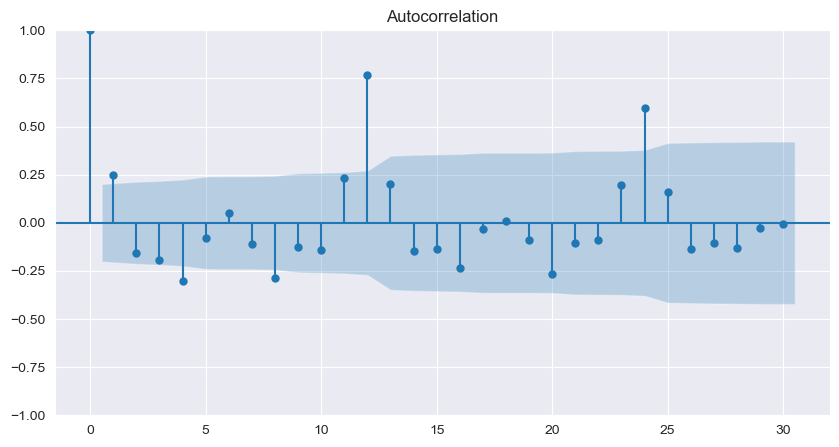

In [17]:
plot_acf(df['First-order'],lags=30)
plt.show()

In [18]:
# Partial Autocorrelation Function

In [19]:
pacf_val=pacf(df['First-order'])
pacf_val

array([ 1.00000000e+00,  2.49822741e-01, -2.36758342e-01, -1.03692905e-01,
       -3.01485928e-01,  2.23374632e-02, -8.40227411e-02, -2.53404035e-01,
       -4.46435582e-01, -2.23664740e-01, -6.53266123e-01, -3.65821471e-01,
        5.90496055e-01, -1.20748181e-01, -2.79572058e-01,  2.59046851e-01,
        4.43131573e-04, -1.03548748e-01, -2.89705180e-01,  3.92893315e-01])

In [20]:
# plot pacf

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


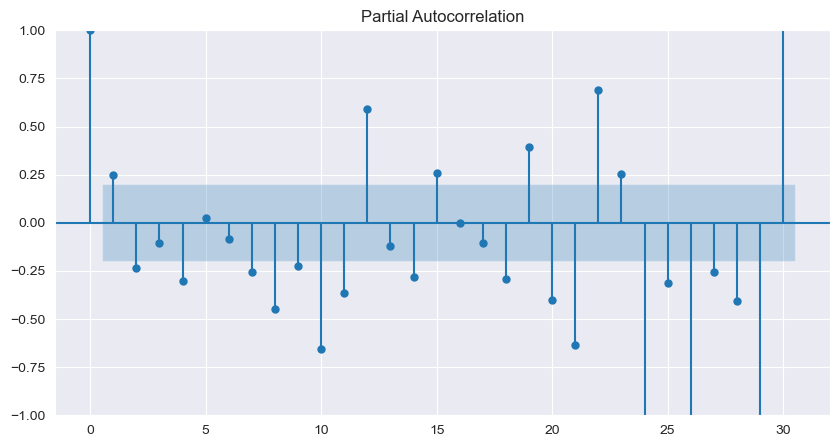

In [21]:
plot_pacf(df['First-order'],lags=30)
plt.show()

In [22]:
# so according to the acf and pacf graph the 12th lag variable is affecting the current column 

#### Transforming the data

In [32]:
df['log_passenger']=np.log(df['Passengers'])

In [33]:
df.head()

,Month,Passengers,First-order,log_trans,month,year,log_passenger
1,1995-02-01,118,6.0,4.770685,Feb,95,4.770685
2,1995-03-01,132,14.0,4.882802,Mar,95,4.882802
3,1995-04-01,129,-3.0,4.859812,Apr,95,4.859812
4,1995-05-01,121,-8.0,4.795791,May,95,4.795791
5,1995-06-01,135,14.0,4.905275,Jun,95,4.905275


<Axes: >

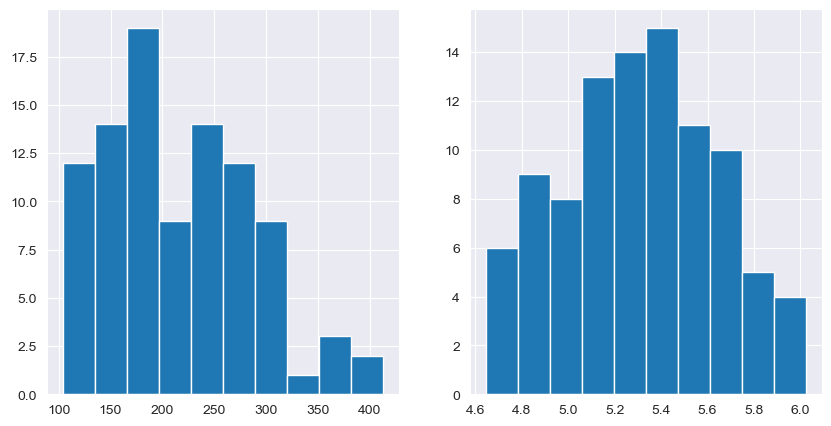

In [34]:
plt.subplot(1,2,1)
df['Passengers'].hist()
plt.subplot(1,2,2)
df['log_passenger'].hist()

In [35]:
# so after log transformation the data is converted into nearly distibuted

### Moving Average

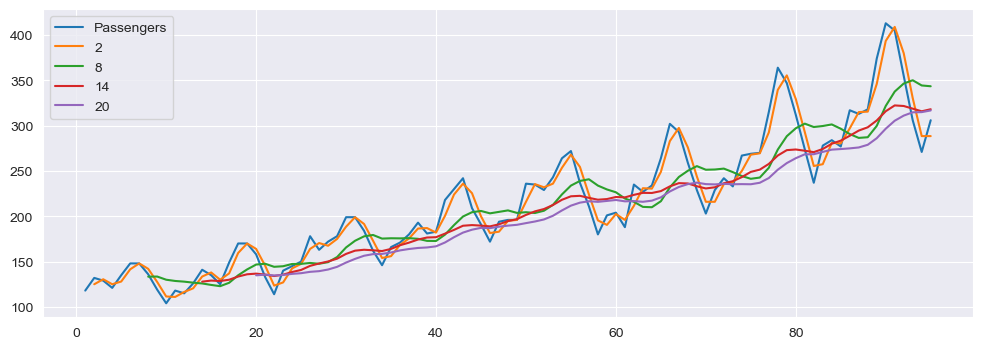

In [46]:
# Moving Average
plt.figure(figsize=(12,4))
df['Passengers'].plot()
df['Passengers'].rolling(10).mean().plot


for i in range(2,24,6):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend()

#### Extracting the day , month and year from the Month column

In [37]:
df['month']=df.Month.dt.strftime('%b')
df['year']=df.Month.dt.strftime('%y')

In [44]:
import datetime

df['m'] = range(1,(df.shape[0]+1))
df['m_square'] = np.power(df['m'],2)
df['log_Passengers']=np.log(df['Passengers'])
df.head()

,Month,Passengers,First-order,month,year,m,m_square,log_Passengers
1,1995-02-01,118,6.0,Feb,95,1,1,4.770685
2,1995-03-01,132,14.0,Mar,95,2,4,4.882802
3,1995-04-01,129,-3.0,Apr,95,3,9,4.859812
4,1995-05-01,121,-8.0,May,95,4,16,4.795791
5,1995-06-01,135,14.0,Jun,95,5,25,4.905275


In [45]:
ddf = pd.get_dummies(df.iloc[:,3],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
# concatinating both the dataset

In [48]:
df=pd.concat([df,ddf],axis=1)
df

,Month,Passengers,First-order,month,year,m,m_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,1995-02-01,118,6.0,Feb,95,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,14.0,Mar,95,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,-3.0,Apr,95,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,-8.0,May,95,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,14.0,Jun,95,5,25,4.905275,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,Aug,02,91,8281,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,-50.0,Sep,02,92,8464,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,-49.0,Oct,02,93,8649,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,-35.0,Nov,02,94,8836,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
col = ['Month', 'Passengers', 'month', 'm', 'm_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = pd.DataFrame(df,columns=col)
df1

,Month,Passengers,month,m,m_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1995-02-01,118,Feb,1,1,95,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,2,4,95,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,3,9,95,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,4,16,95,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
5,1995-06-01,135,Jun,5,25,95,4.905275,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,91,8281,02,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,92,8464,02,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,93,8649,02,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,94,8836,02,5.602119,0,0,0,0,0,0,0,0,0,0,1,0


###  Splitting The Data

In [50]:
train = df1.head(70)
test = df1.tail(10)

### Applying the different forecasting model 

#### 1.Linear Model

In [56]:
linear_model=smf.ols('Passengers~m',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['m'])))
rmse_linear=np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_linear

63.49003138041478

#### 2.Exponential Model

In [57]:
exp=smf.ols('log_Passengers~m',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['m'])))
rmse_exp=np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

334.9611645631431

#### 3.Quadratic Model

In [58]:
quad=smf.ols('Passengers~m+m_square',data=train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test[['m','m_square']])))
rmse_quad=np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

60.23281147824414

#### 4.Additive Seasonality

In [59]:
add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

rmse_add_sea=np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

153.04836054877123

#### 5.Additive Seasonality with quadratic Trend

In [60]:
add_sea_que=smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_que=pd.Series(add_sea_que.predict(test[['m','m_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_que=np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_que))
rmse_add_sea_que

47.07153510215146

#### 6.Multiplicative Seasonality

In [61]:
mul_sea=smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea=pd.Series(mul_sea.predict(test[['m','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mult_sea=np.sqrt(mean_squared_error(test['Passengers'],pred_mult_sea))
rmse_mult_sea

334.9247924566758

#### Comparing all the models

In [62]:
# compare the results of all models

data={'MODEL':pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_que','rmse_mult_sea']),
     'RMSE_values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_que,rmse_mult_sea])
     }

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_values'])

,MODEL,RMSE_values
4,rmse_add_sea_que,47.071535
2,rmse_quad,60.232811
0,rmse_linear,63.490031
3,rmse_add_sea,153.048361
5,rmse_mult_sea,334.924792
1,rmse_exp,334.961165


#### Conclusion: so the additive seasonality with quadratic trend model gives the least rmse value that is 47